# AAYUSH BHARUKA

## 1. Dataset Selection

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    precision_score, recall_score, f1_score
)

# Load dataset (Replace 'dataset.csv' with your actual dataset)
df = pd.read_csv(r"C:\Users\KIIT\Downloads\DATASETS\Breast_Cancer.csv")

# Display dataset overview
print("\nDataset Overview:")
print(df.info())
print(df.describe())

# Handle categorical variables by encoding them
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

# Handle missing values (fill with mean for numerical columns)
df.fillna(df.mean(), inplace=True)





Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null

## 2.Data Preparation

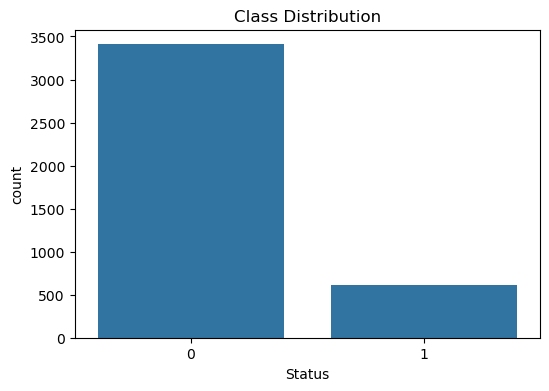

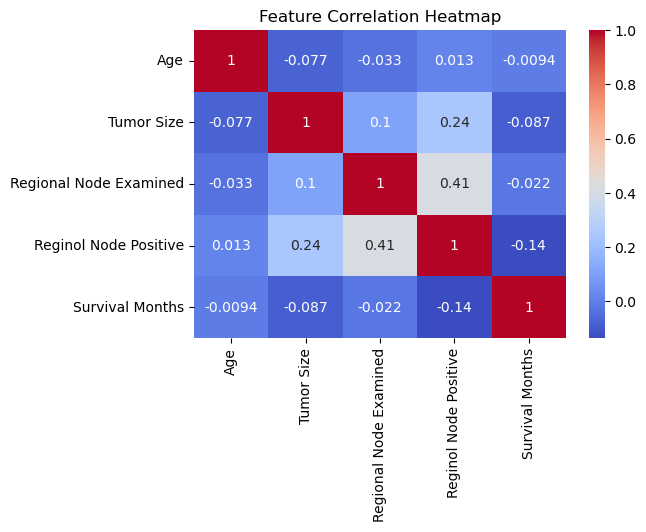

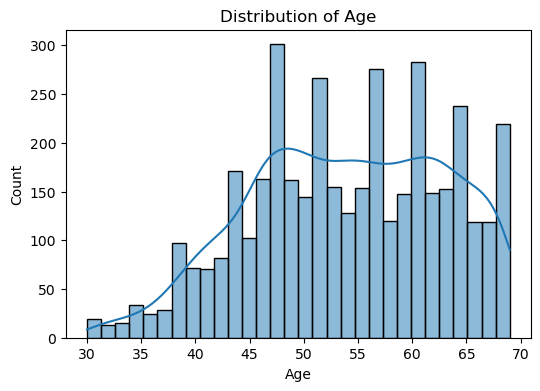

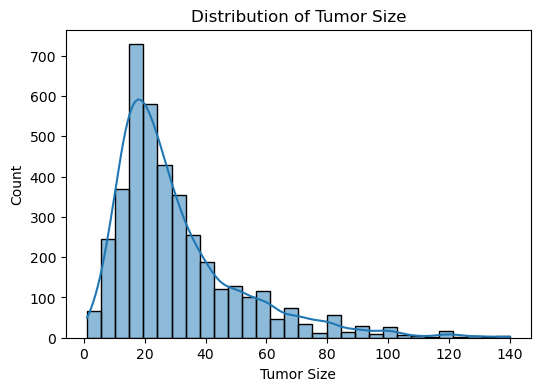

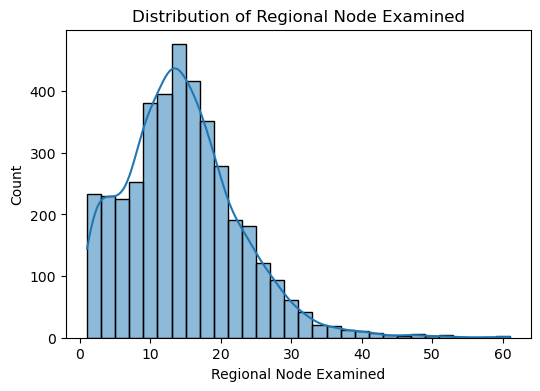

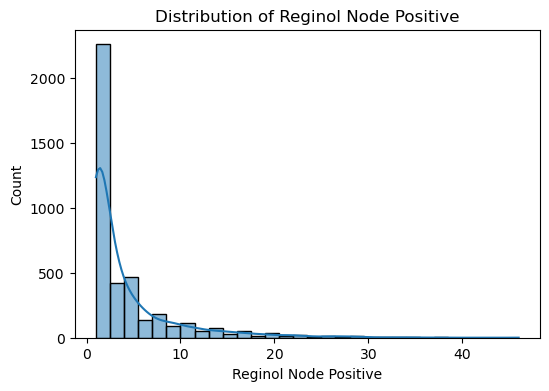

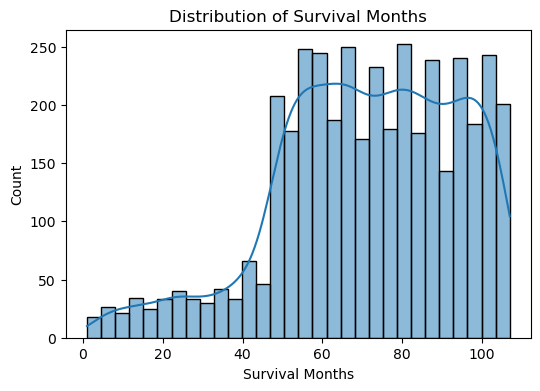

Data preprocessing and EDA completed.


In [ ]:
# Splitting features and target (Assuming last column is the target variable)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-Test Split (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature Scaling (Standardizing numerical data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df)
plt.title('Class Distribution')
plt.show()

# Correlation heatmap (only for numerical features)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
plt.figure(figsize=(6,4))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Distribution plots for numerical features
for feature in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.show()

print("Data preprocessing and EDA completed.")

## 3.Model Implementation 
## 4.Model Evaluation

In [ ]:
# Implementing Classification Models

def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"{model_name} Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"{model_name} Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"{model_name} F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print("-" * 50)
    
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

# K-Nearest Neighbors (KNN) with different k values
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    evaluate_model(y_test, y_pred_knn, f"KNN (k={k})")

# Decision Tree with post-pruning (max_depth to prevent overfitting)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

print("Data preprocessing, EDA, and classification completed.")

Naive Bayes Confusion Matrix:
[[888 135]
 [100  85]]
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1023
           1       0.39      0.46      0.42       185

    accuracy                           0.81      1208
   macro avg       0.64      0.66      0.65      1208
weighted avg       0.82      0.81      0.81      1208

Naive Bayes Accuracy: 0.8055
Naive Bayes Precision: 0.8203
Naive Bayes Recall: 0.8055
Naive Bayes F1 Score: 0.8122
--------------------------------------------------
KNN (k=3) Confusion Matrix:
[[982  41]
 [114  71]]
KNN (k=3) Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1023
           1       0.63      0.38      0.48       185

    accuracy                           0.87      1208
   macro avg       0.76      0.67      0.70      1208
weighted avg       0.86      0.87      0.86      1208

KNN (k=3

## 5. Comparison and Analysis


Model Comparison:
                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.805464   0.820310  0.805464  0.812177
1            KNN (k=3)  0.871689   0.855853  0.871689  0.858130
2            KNN (k=5)  0.873344   0.856725  0.873344  0.854836
3            KNN (k=7)  0.871689   0.855439  0.871689  0.846838
4        Decision Tree  0.893212   0.883628  0.893212  0.883098
5  Logistic Regression  0.893212   0.883618  0.893212  0.882714


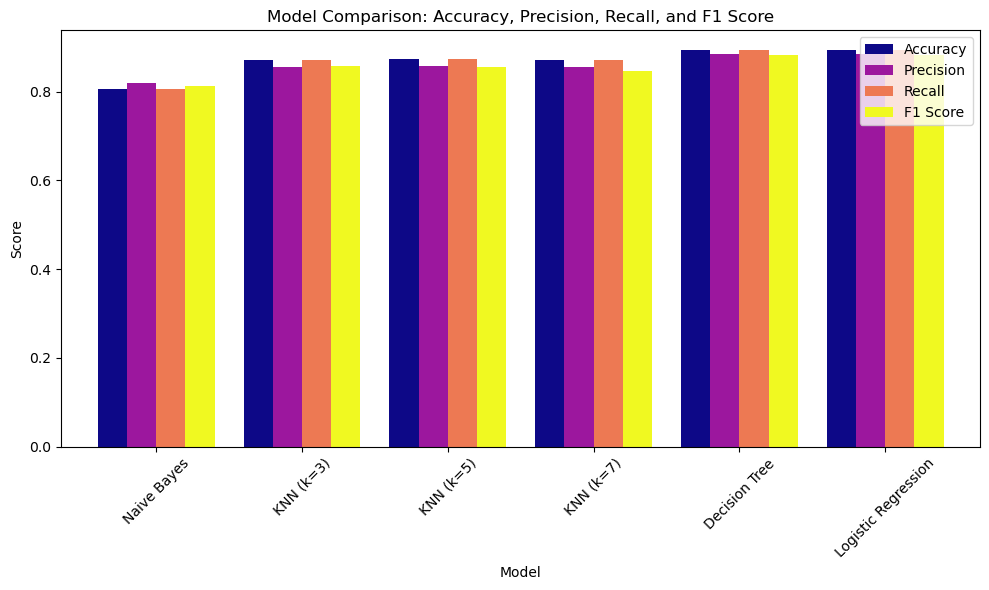


The best performing model based on F1 Score is: Decision Tree


In [ ]:
# Initialize an empty list to store model performance metrics
model_metrics = []

# Define a function to evaluate models and store results
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics of each model to the list
    model_metrics.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
evaluate_model(y_test, y_pred_nb, "Naive Bayes")

# K-Nearest Neighbors (KNN) with different k values
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    evaluate_model(y_test, y_pred_knn, f"KNN (k={k})")

# Decision Tree with post-pruning (max_depth to prevent overfitting)
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Convert model metrics into a pandas DataFrame for easy comparison
model_metrics_df = pd.DataFrame(model_metrics)

# Display the model comparison
print("\nModel Comparison:")
print(model_metrics_df)

# Plot the comparison of performance metrics for all models
model_metrics_df.set_index("Model").plot(kind="bar", figsize=(10, 6), width=0.8, colormap='plasma')
plt.title('Model Comparison: Accuracy, Precision, Recall, and F1 Score')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Identifying the best model based on F1 Score
best_model = model_metrics_df.loc[model_metrics_df['F1 Score'].idxmax()]
print(f"\nThe best performing model based on F1 Score is: {best_model['Model']}")
